# Skin Segmentation: Experiments with Logistic Regression

### Project Goal

To experiment with a real-world application of logistic regression to further my understanding of machine learning.

### Question Answered by Model

What is the (*log odds of*) probability that a pixel containing R, G, B values represents the skin of human face?

### Why (Binary) Logistic Regression?

Binary classification problems are perfect for logistic regression because logistic regression allows us to predict the probability of a discrete outcome (here, a pixel containing skin or no skin) based on a set of independent features (here, R, G, and B values) related to that outcome.

**Why not linear regression?** While the underlying mechanism in logistic regression is linear regression (because the log odds probability of the outcome is a linear function of the features), linear regression is best used when trying to model the linear relationship between various (discrete or continuous) features with a *continuous* outcome. Moreover, linear regression models aim to minimize the sum of squared errors, while logistic regression models aim to model the parameters under which our observations become most likely.

**Why not a Decision Tree?** Great question! This dataset would work great with a decision tree. To put it simply, the goal of this project was for me to explore a real-world application of logistic regression. In the future, I would love to optimize my model by employing the ID3 & CART algorithms.

### Dataset

The dataset used in this project is called Skin Segmentation, which can be access [here](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation).

The data in Skin Segmentation were collected "by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database." It has 245,057 rows and 4 columns (B, G, R, and a binary column indicating whether the pixel was classified as containing skin or not containing skin).

The dataset has been cited in two scholarly articles, both of which are viewable (although pay-walled) via the link above, and was made available to the public in 2012 by Rajen Bhatt and Abhinav Dhall.

### Future Possibilities

In addition to optimizing my model by testing out the ID3 and CART decision tree algorithms, I would love to do some hyperparameter tuning after testing my model out with a various pictures of my friends.

## LOADING & CLEANING THE DATA

In [192]:
# Importing the Pandas library w/the alias "pd" for easier coding.
# Setting the URL variable equal to the URL at which my dataset is located.
# Reading the dataset into a variable called df with the use of Pandas, thereby creating a dataframe ("df") out of it.
# Inspecting the first five rows of df.

import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'

df = pd.read_csv(url, sep = '\s+', header=None) # using whitespace as my separator

df.head()

,0,1,2,3
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [193]:
# Renaming column headers for clarity

df = df.rename(columns = {0:'B', 1: 'G', 2: 'R', 3: 'Skin or No-Skin'})
df.head()

,B,G,R,Skin or No-Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [213]:
# We can see that our target variable is binary, but that it's made of 1s and 2s.
# The best practice is to have our binary variable be represented as 0s and 1s. 
# So, let's change our Skin or No-Skin variable to 0s and 1s.

df['Skin or No-Skin'][df['Skin or No-Skin']==1]=0
df['Skin or No-Skin'][df['Skin or No-Skin']==2]=1

# Viewing column to make sure above code worked
df['Skin or No-Skin']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
245027    1
245028    1
245029    1
245030    1
245031    1
245032    1
245033    1
245034    1
245035    1
245036    1
245037    1
245038    1
245039    1
245040    1
245041    1
245042    1
245043    1
245044    1
245045    1
245046    1
245047    1
245048    1
245049    1
245050    1
245051    1
245052    1
245053    1
245054    1
245055    1
245056    1
Name: Skin or No-Skin, Length: 245057, dtype: int64

## EXPLORING THE DATA

In [214]:
# Inspecting the values and percentages of my classes

print(df['Skin or No-Skin'].value_counts())
print(df['Skin or No-Skin'].value_counts(normalize=True))

1    194198
0     50859
Name: Skin or No-Skin, dtype: int64
1    0.792461
0    0.207539
Name: Skin or No-Skin, dtype: float64


#### Interpretation
From the value_counts() readout above, you can see that the outcome variable is binary and is represented in 1s and 2s.

From our dataset's description ([here](https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation)), we know that the skin samples total 50,859 in number, while the no-skin samples total 194,198. So, here **0s are skin-pixels and 1s are no-skin pixels.**

We can see in the normalized readout (the 2nd one, showing the percentages of the total that each label makes up) that our dataset is a bit imbalanced: about 79% of our pixels are classified as no-skin while about 21% of our pixels are classified as skin. 

While we could try to balance our dataset using a technique like SMOTE (For more on SMOTE, I recommend checking out Nick Becker states in his blog post "[The Right Way to Oversample](https://beckernick.github.io/oversampling-modeling/)), in data-science circles this type of imbalance is perfectly acceptable; if we had a split along the lines of 99% v 1%, then we might consider taking the time to balance our data

## PREPARING THE DATA

In [215]:
# assigning our target variable to "y"

y = df['Skin or No-Skin']

In [216]:
# creating a dataframe (matrix) for our x-variables, making sure to drop null values

X = df.iloc[:,:-1].dropna()
X.head()

,B,G,R
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b9ee6a0>,
      dtype=object)

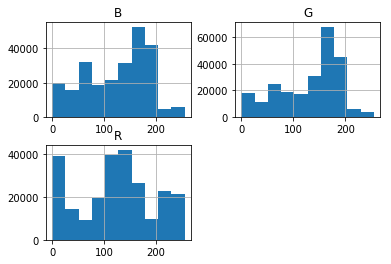

In [217]:
# Inspecting the distributions of our independent variables (x-variables, or "features")
# (Since we're doing logistic regression, we don't need to normalize or scale our features, but it's nice to explore their distributions)

X.hist()

#### Interpretation

You can see above that our features are relatively normally distributed. While we don't **need** our features to be normally distributed to run logistic regression, it does make our data nicer to work with and is good to keep in mind when interpreting our results.

### Train, Test, Split

When running machine learning algorithms, you want to need to split your data into a training set and a test set so that you can evaluate your model's performance on previously-unseen data. 

Here I use Scikit Learn's train_test_split function to get an 80/20 split between our train/test data for our X and y values.

In [218]:
# Split my data into test and train datasets
# Test size of 20% ensures I get an 80/20 split
# Random state can be set to any number, but setting it to zero is easy for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


## MODELING THE DATA & EVALUATING THE MODEL

Here, I am instantiating a Logistic Regression object (without an intercept just to keep things easy, and a C parameter of something super, super small in order to reduce overfitting) called logreg (see [here](https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul) for more info on C-parameters)

In [245]:
# Instantiating logreg object
logreg = LogisticRegression(fit_intercept = False, C = 1e12)

# Fitting model to my training data
model_log = logreg.fit(X_train, y_train)

# Using my model to make predictions re: the labels of the outcome using my test features (that my model hasn't seen before)
y_hat_test = logreg.predict(X_test)

# Evaluating metrics of my model
from sklearn.metrics import *

print ('\nTEST RESULTS')
print (f'Accuracy Score: {round(model_log.score(X_test, y_test),2)}')
print (f'Recall: {round(recall_score(y_test, y_hat_test),2)}')
print (f'F-1 Score: {round(f1_score(y_test, y_hat_test),2)}')
print (f'Precision: {round(precision_score(y_test, y_hat_test),2)}')


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



TEST RESULTS
Accuracy Score: 0.91
Recall: 0.92
F-1 Score: 0.94
Precision: 0.96


In [220]:
# Alternative readout of above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79     10147
           1       0.96      0.92      0.94     38865

   micro avg       0.91      0.91      0.91     49012
   macro avg       0.85      0.88      0.86     49012
weighted avg       0.91      0.91      0.91     49012



#### Test Results Interpretation

You can see above that my model's accuracy score (i.e. the correct predictions from all predictions made) is 91%. This means that my model will classify an before-unseen pixel as containing skin or no skin 91% of the time.

My model's recall, f-1 score, and precision are lower than its accuracy. In the future, it might be nice to do some feature engineering and/or hyperparameter tuning to improve these metrics.

As a reminder:
- Recall or *sensitivity* is the number of true positives divided by the number of true positives plus the number of false negatives. 
- Precision is number of true positives over the total number of predicted positives.
- An f-1 Score is essentially a single number that takes into account both precision and recall to give interpreters a quick idea of model performance (kind of like the balance between the two).

Depending on the task at hand, I might want to prioritize increasing my model's precision over its recall (or vice versa). If my model were to be used for determining whether there were people on the ground before a bomb strike, I would very likely want to prioritize precision – it would be better to be very, very sure there are no people and risk missing an inanimate object by a few feet than vice versa.

(You can also see from the "Classification Report" above that our metrics are higher on our no-skin pixels, but that our priority lies with identifying pixels containing people's faces.)

### Confusion Matrix & ROC/AUC

[[ 8539  3018]
 [ 1608 35847]]


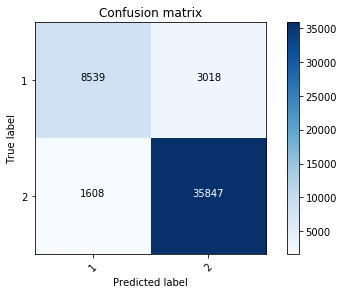

In [221]:
# For alternative ways to evaluate our model, I will also inspect a confusion matrix
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix,classes=[1,2])

#### Confusion Matrix Interpretation

As you can see from above, our model did have incorrect classifications a fair bit of the time (1,608 false positives (3%) and 3,018 false negatives (2%)), but nothing too alarming. What's most important is that the model classified skin-having pixels as skin and non-skin-having pixels as no-skin 91% of the time.

In [224]:
# Evaluating model using a ROC-AUC curve
from sklearn.metrics import roc_curve, auc

# creating ROC curve of our test data
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# fpr stands for false positive rate, and tpr stands for true positive rate.
fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC is 0.9328273669481115


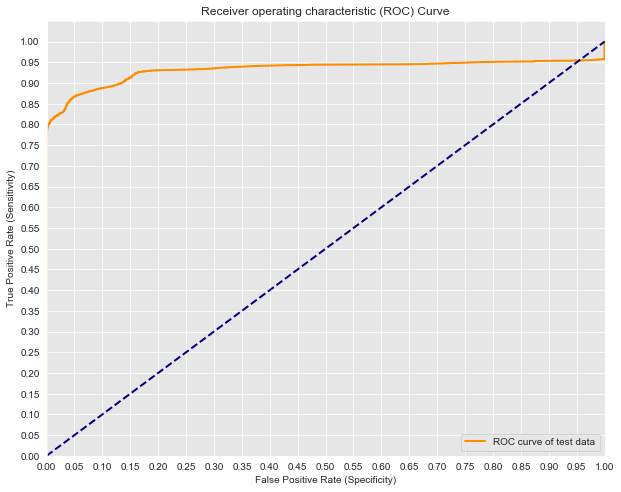

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC is {}'.format(auc(fpr, tpr)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Interpreting ROC Curve & AUC Metric

As Will Koehrsen writes in his great [blog post](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c) on evaluation metrics, "the ROC curve shows how the recall vs precision relationship changes as we vary the threshold for identifying a positive in our model."

The usefulness of an ROC curve is that it gives its interpreter a visualization of what happens when we move the threshold up or down for our true positives and false negatives (i.e. the tradeoff between sensitivity (trp) and specificity (fpr). The more accurate our model, the more our curve will hug the top left side of the graph, which what ours is doing! (For most of us the ideal ROC-curve would look like a 90-degree angle, which would indicate 100% sensitivity and 100% specificity – Check out this [great video](https://www.youtube.com/watch?v=egTNM8NSa2k) for more info.) 

After checking out our ROC curve, interpreters should calcuate the AUC, which is the total area under the curve. This is a single-number summary of a model's accuracy. The higher the AUC, the better the model (a random classifier, represented by the dotted blue line above, has an AUC of 0.5, which we always want to aim above). As you can see, our models' AUC is 0.93, which is pretty good.

## BUT DOES THE MODEL HOLD UP? 

By evaluating my model by using K-Fold Cross-Validation, I can see if my model holds up to more rigorous testing.

In k-fold cross-validation, instead of relying on a single instance of train-test-split, the results of which rely heavily on which observations happen to be put into the test group (i.e. there is the possibility of high bias), the algorithm splits up my data into k equal-sized groups and uses each group as the other group's validation set (or "test" data). It then repeats this for each group k number of times and outputs the mean accuracy of all the groups in total.

In the code below, k represents the number of train-test-split groups I use in my cross-validation step. After toggling this value a bit, I see the best results with k = 4.

In [255]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# Instantiating my model
logreg = LogisticRegression(fit_intercept = False,C = 1e12)

# Computing cv score (don't run train_test_split beforehand)
scores = cross_val_score(logreg, X, y, cv = 4, scoring='accuracy')


/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [257]:
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.08)


#### Cross-Validation Interpretation

Cross-validation (cv) is a very important tool for data scientists because it signals to us whether our model is over- or underfit. Since our scores here a significantly similar to our model created with the train-test-split method, we know that our model is pretty sound. In more formal terms, cv "is a technique for assessing how the statistical analysis generalizes to an independent dataset" (- [here](https://www.digitalvidya.com/blog/cross-validation-in-machine-learning/)).

There are many types of cross-validation one could use on a machine learning model. From what I understand, the most widely used method is k-fold cross-validation because of its computational simplicity (using sklearn, at least) and efficiency (provided your k isn't gigantic (typically, k = 10 is tested first)).

As explained in this [blog post](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f), I could haved used stratified k-fold cross-validation if my target variable were imbalanced (which mine is only slightly), or I could have used leave-one-out cross-validation, which runs the risk of being more computationally expensive than k-fold cross-validation.

## FINAL INTEREPRETATION & DISCUSSION

The final word on our model is that it classifies pixels correctly 91% of the time, with a recall of 84% and a precision of 74%, meaning that it does a better job at collecting relevant datapoints than correctly classifying datapoints as relevant. 

As mentioned briefly above, the optimization I could do to my model in order to raise or lower these scores would depend greatly on the domain in which I was working. This is precisely the ethical dilemma that data scientists focusing on machine learning face everyday. We have to ask ourselves what the acceptable tradeoff between precision and recall is, and we have to interrogate the bias of those defining the thresholds of that acceptability.

If you have questions or want to get in touch, feel free to email me at aulorbe@gmail.com.